### Блок импорта библиотек

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression #
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #модель разбиения данных на тест и обучение
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, scale #Модель нормализации данных
%pylab inline
%matplotlib notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 80)

Populating the interactive namespace from numpy and matplotlib


### Исследование данных

In [2]:
#Загрузка данных
data=pd.read_csv('./train.csv',  keep_default_na=True)

In [3]:
data.describe()   #есть ли еще функции, выводящие сводную статистику?

galactic year  existence expectancy index  \
count   3.865000e+03                 3864.000000   
mean    1.000709e+06                    0.872479   
std     6.945463e+03                    0.162367   
min     9.900250e+05                    0.227890   
25%     9.950060e+05                    0.763027   
50%     1.000000e+06                    0.907359   
75%     1.006009e+06                    0.992760   
max     1.015056e+06                    1.246908   

       existence expectancy at birth  Gross income per capita  Income Index  \
count                    3864.000000              3837.000000   3837.000000   
mean                       76.798111             31633.240872      0.825154   
std                        10.461654             18736.378445      0.194055   
min                        34.244062              -126.906522      0.292001   
25%                        69.961449             20169.118912      0.677131   
50%                        78.995101             26600.768195      0.827300   
75%                        84.558971             36898.631754      0.970295   
max                       100.210053            151072.683156      1.361883   

       Expected years of education (galactic years)  \
count                                   3732.000000   
mean                                      14.723296   
std                                        3.612546   
min                                        3.799663   
25%                                       12.592467   
50%                                       14.942913   
75%                                       17.123797   
max                                       26.955944   

       Mean years of education (galactic years)  \
count                               3502.000000   
mean                                  10.283959   
std                                    3.319948   
min                                    1.928166   
25%                                    7.654169   
50%                                   10.385465   
75%                                   12.884752   
max                                   19.057648   

       Intergalactic Development Index (IDI)  Education Index  \
count                            3474.000000      3474.000000   
mean                                0.804246         0.745900   
std                                 0.176242         0.199795   
min                                 0.273684         0.189874   
25%                                 0.671862         0.597746   
50%                                 0.824758         0.761255   
75%                                 0.939043         0.893505   
max                                 1.232814         1.269625   

       Intergalactic Development Index (IDI), Rank  \
count                                  3432.000000   
mean                                    135.129178   
std                                      52.449535   
min                                       9.925906   
25%                                      92.262724   
50%                                     135.914318   
75%                                     175.301993   
max                                     278.786613   

       Population using at least basic drinking-water services (%)  \
count                                        2021.000000             
mean                                          101.892238             
std                                            20.319860             
min                                            33.135967             
25%                                            89.467683             
50%                                           108.420709             
75%                                           116.904405             
max                                           136.321824             

       Population using at least basic sanitation services (%)  \
count                                        2015.000000         
mean                              

In [4]:
data.info()   #проверка типов признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [5]:
#needed_col = list(data.columns)
#needed_col.remove('galaxy')
df = data.dropna(axis=1, thresh=0.3*data.count().max())
df = df.drop('galaxy', axis=1)
#df = df.loc[:,needed_col]
#df = df.drop(['galaxy', 'existence expectancy index', 'Life expectancy at birth, female (galactic years)',
#              'Mortality rate, under-five (per 1,000 live births)','Intergalactic Development Index (IDI)',
#             'Mortality rate, infant (per 1,000 live births)', 'Life expectancy at birth, male (galactic years)',
#             'Mortality rate, female grown up (per 1,000 people)', 'Mortality rate, male grown up (per 1,000 people)'], axis=1)
(abs(df.iloc[:,:].corr()))

galactic year  \
galactic year                                            1.000000   
existence expectancy index                               0.187039   
existence expectancy at birth                            0.181568   
Gross income per capita                                  0.095975   
Income Index                                             0.123550   
Expected years of education (galactic years)             0.282894   
Mean years of education (galactic years)                 0.213887   
Intergalactic Development Index (IDI)                    0.185498   
Education Index                                          0.248211   
Intergalactic Development Index (IDI), Rank              0.171035   
Population using at least basic drinking-water ...       0.124062   
Population using at least basic sanitation serv...       0.092558   
Gross capital formation (% of GGP)                       0.065555   
Population, total (millions)                             0.023482   
Population, urban (%)                                    0.126547   
Mortality rate, under-five (per 1,000 live births)       0.285559   
Mortality rate, infant (per 1,000 live births)           0.293032   
Old age dependency ratio (old age (65 and older...       0.097474   
Population, ages 15–64 (millions)                        0.027642   
Population, ages 65 and older (millions)                 0.006658   
Life expectancy at birth, male (galactic years)          0.249722   
Life expectancy at birth, female (galactic years)        0.227021   
Population, under age 5 (millions)                       0.040355   
Young age (0-14) dependency ratio (per 100 crea...       0.244495   
Adolescent birth rate (births per 1,000 female ...       0.183216   
Total unemployment rate (female to male ratio)           0.051158   
Vulnerable employment (% of total employment)            0.060794   
Unemployment, total (% of labour force)                  0.023593   
Employment in agriculture (% of total employment)        0.144065   
Labour force participation rate (% ages 15 and ...       0.016951   
Labour force participation rate (% ages 15 and ...       0.063866   
Employment in services (% of total employment)           0.183216   
Labour force participation rate (% ages 15 and ...       0.167155   
Employment to population ratio (% ages 15 and o...       0.034208   
Jungle area (% of total land area)                       0.021864   
Share of employment in nonagriculture, female (...       0.095854   
Youth unemployment rate (female to male ratio)           0.053208   
Unemployment, youth (% ages 15–24)                       0.060248   
Mortality rate, female grown up (per 1,000 people)       0.149795   
Mortality rate, male grown up (per 1,000 people)         0.184159   
Infants lacking immunization, red hot disease (...       0.275838   
Infants lacking immunization, Combination Vacci...       0.132880   
Gross galactic product (GGP) per capita                  0.114685   
Gross galactic product (GGP), total                      0.041182   
Outer Galaxies direct investment, net inflows (...       0.107635   
Maternal mortality ratio (deaths per 100,000 li...       0.161214   
Renewable energy consumption (% of total final ...       0.045131   
y                                                        0.019264   

                                                    existence expectancy index  \
galactic year                                                         0.187039   
existence expectancy index                                            1.000000   
existence expectancy at birth                                         0.906977   
Gross income per capita                                               0.501570   
Income Index                                                          0.719948   
Expected years of education (galactic years)                          0.727130   
Mean years of education (galactic years)                              0.663205   
Intergalactic 

In [6]:
data['galaxy'].value_counts().count()

181

<IPython.core.display.Javascript object>


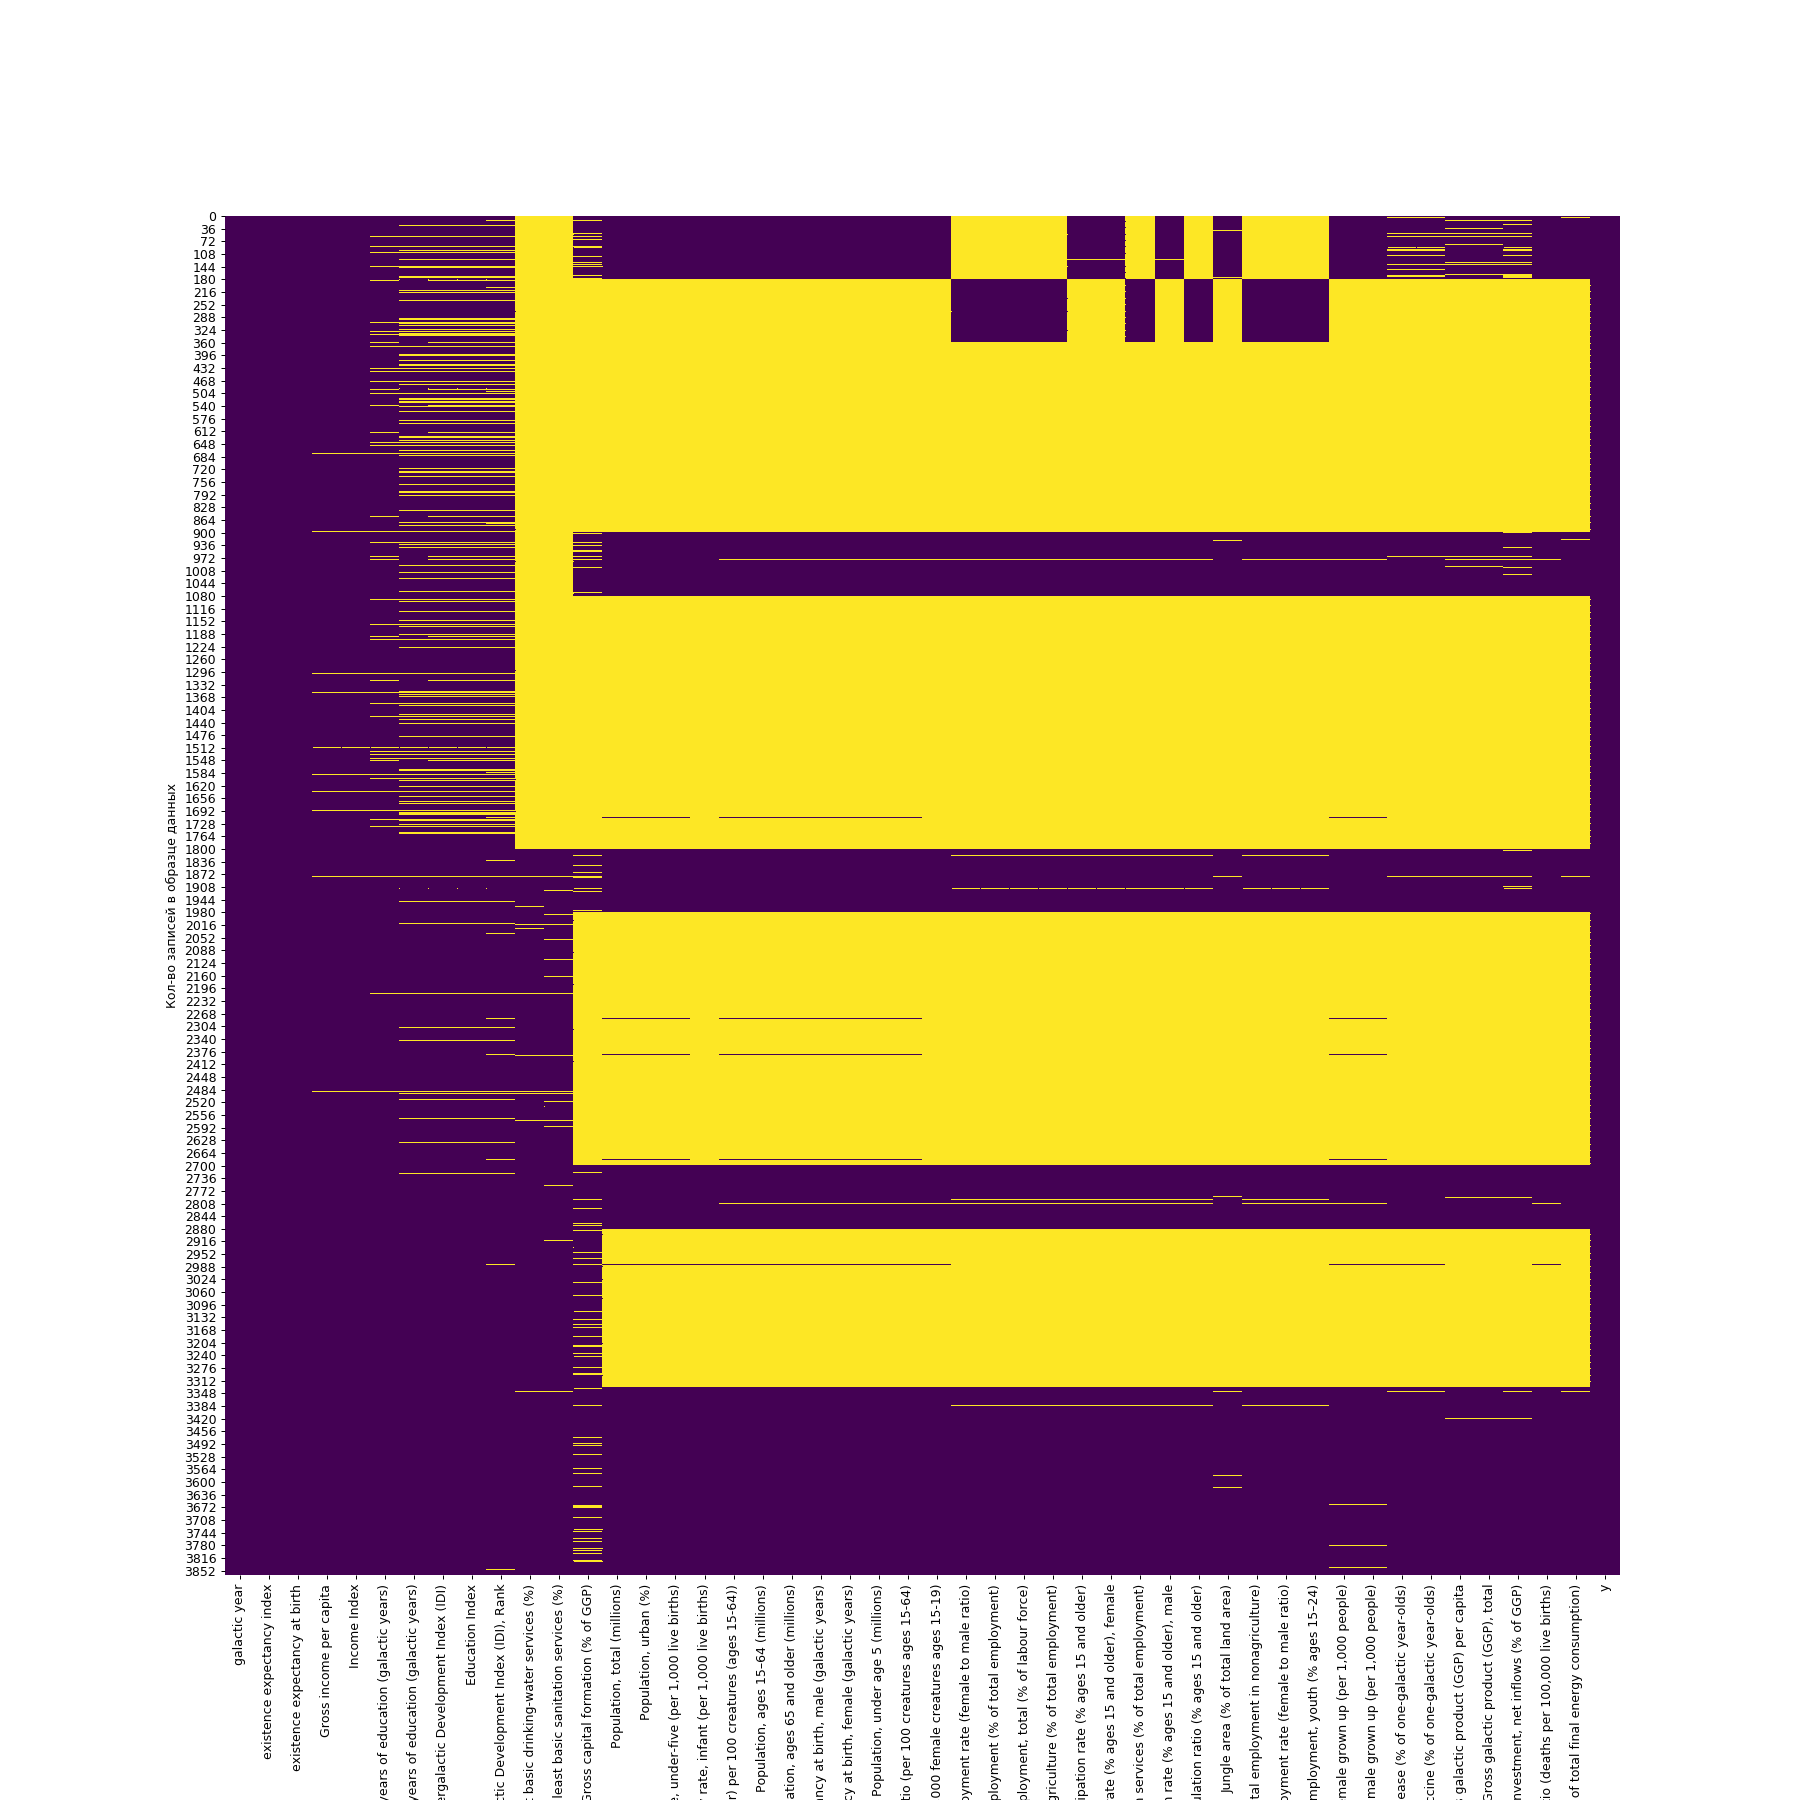

In [7]:
# Желтые ячейки - отсутствующие данные NaN - yellow cells
plt.figure(figsize=(20,20))
ax=sns.heatmap(df.isnull(), cmap='viridis', robust=True, cbar=False ) 
ax.set(xlabel='Признаки', ylabel='Кол-во записей в образце данных')
plt.show()

<IPython.core.display.Javascript object>


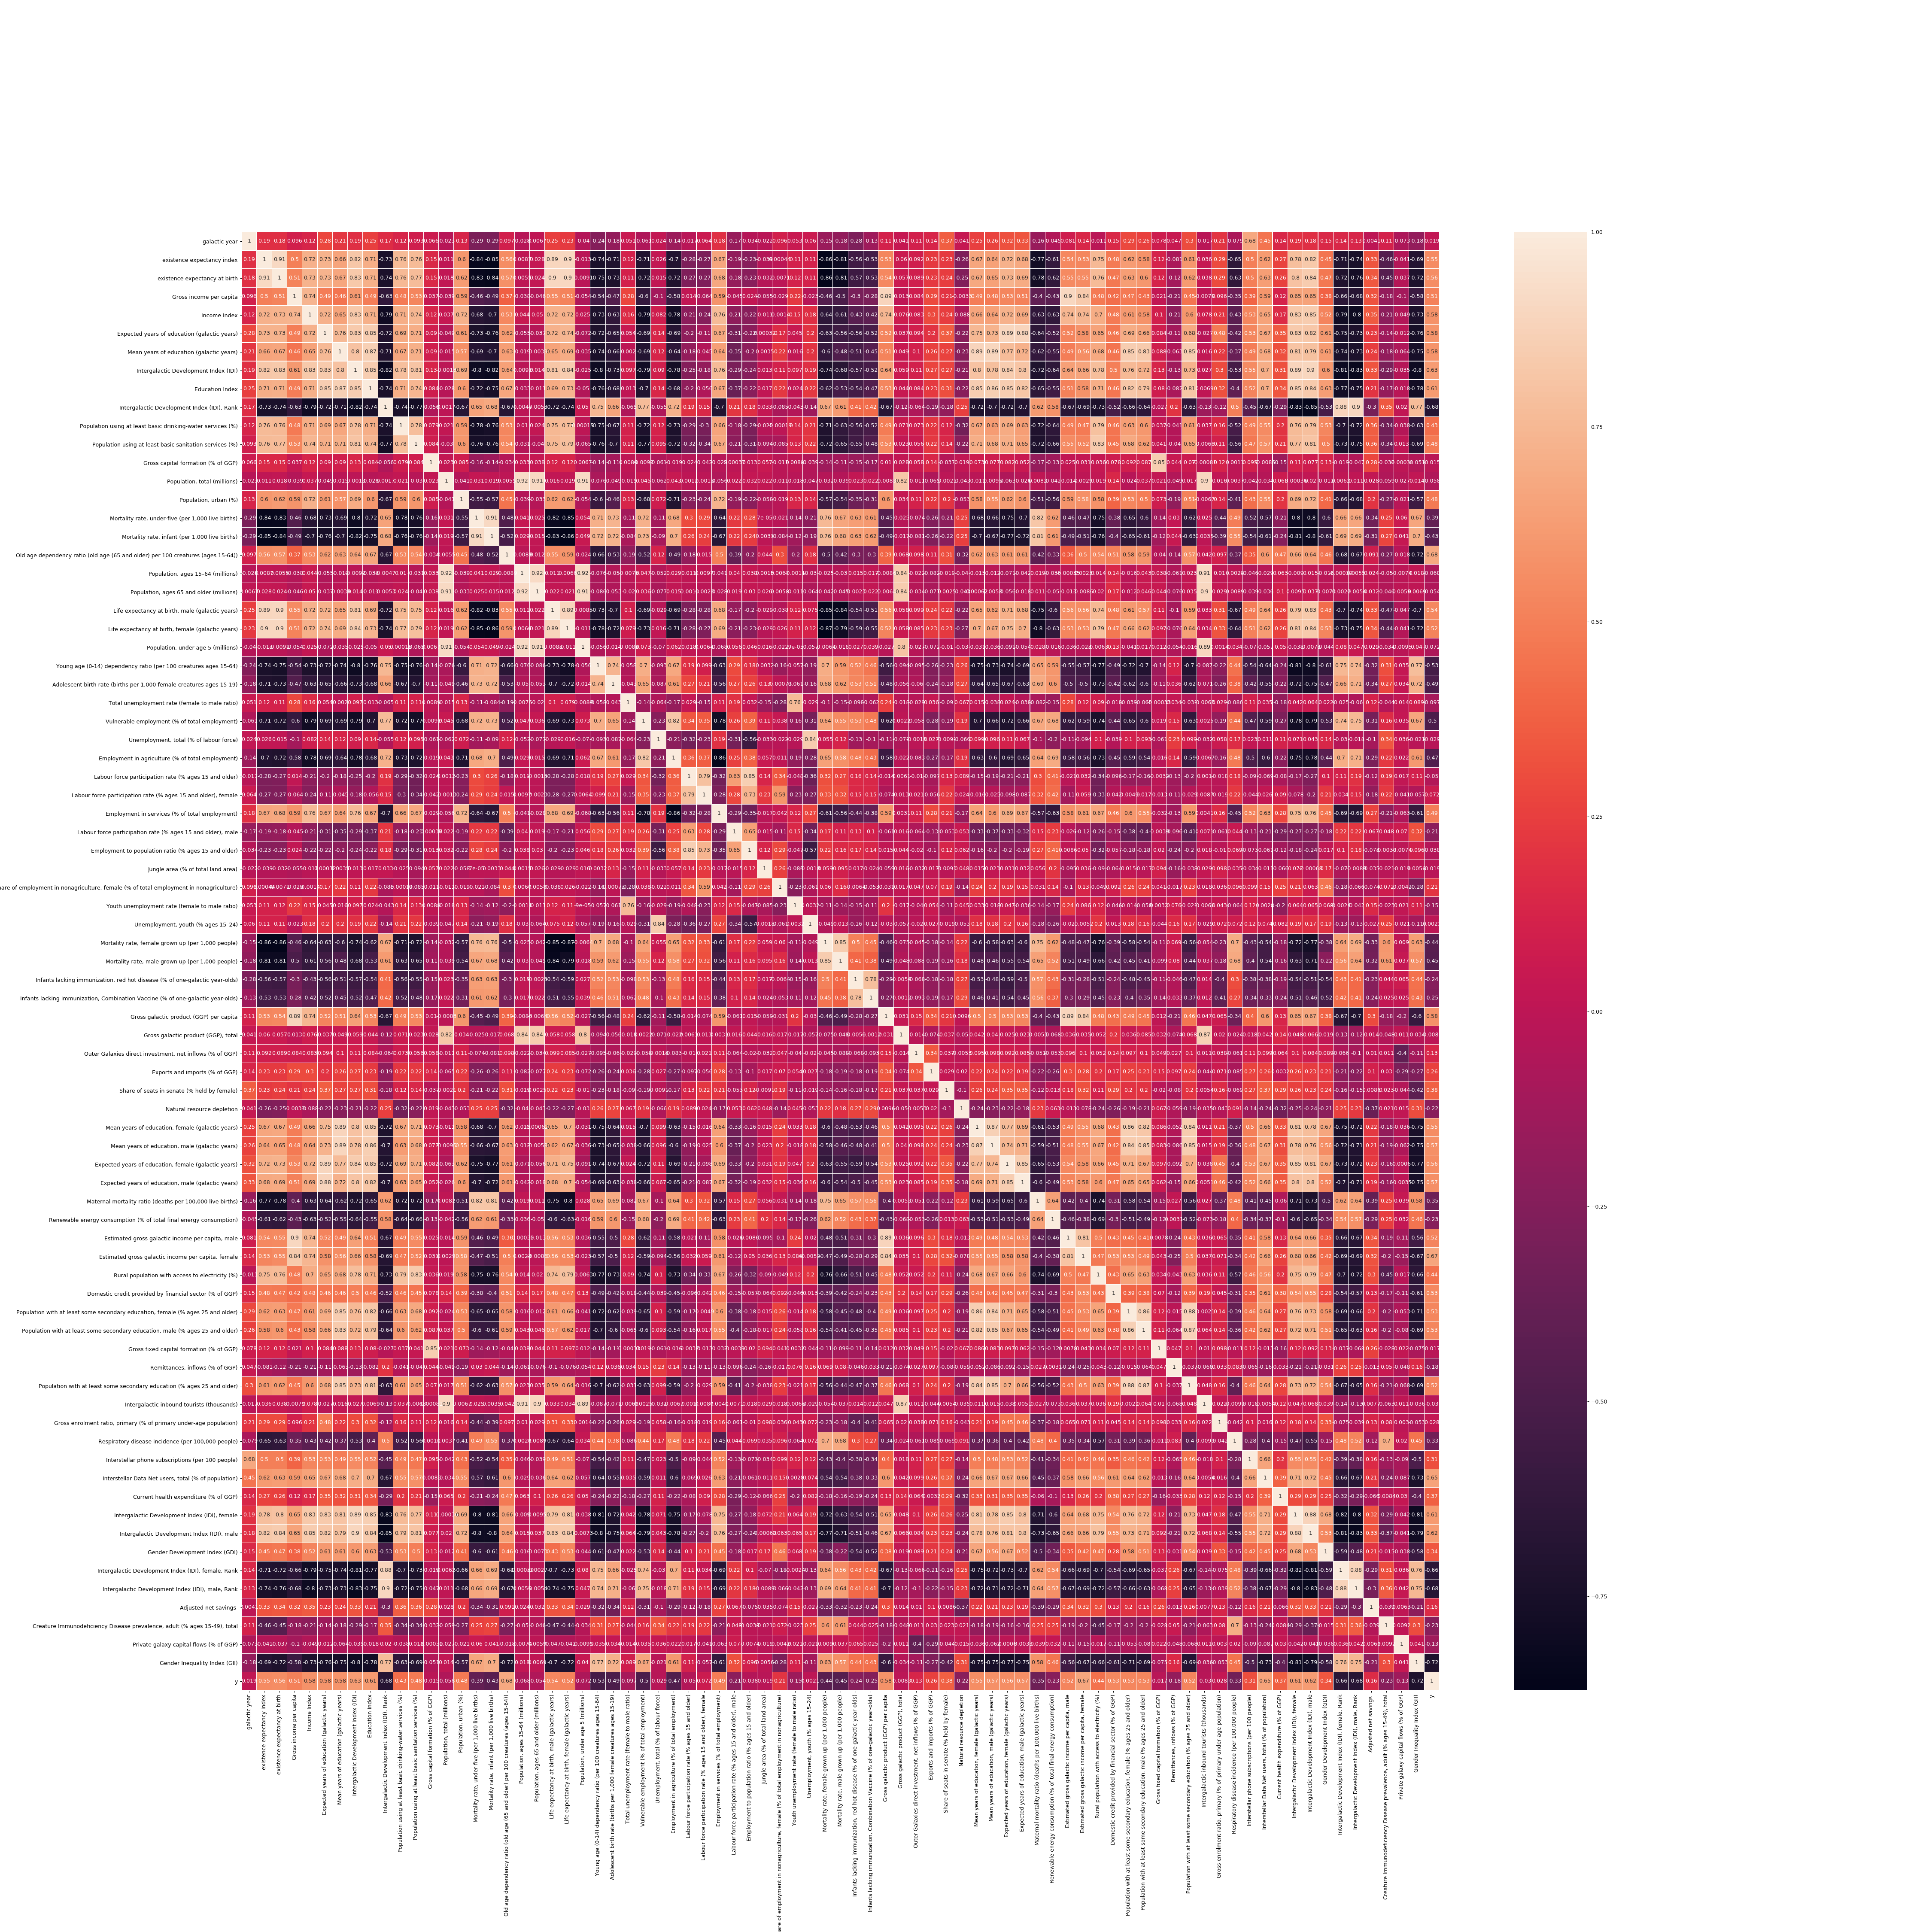

In [8]:
plt.figure(figsize=(50,50))
bx = sns.heatmap(data.iloc[:,:].corr(), yticklabels=True, xticklabels=True, linewidths=.1, annot=True)
plt.show()
#plt.savefig('heatmap.png', dpi=200)

In [9]:
(abs(df.iloc[:,:].corr()))

galactic year  \
galactic year                                            1.000000   
existence expectancy index                               0.187039   
existence expectancy at birth                            0.181568   
Gross income per capita                                  0.095975   
Income Index                                             0.123550   
Expected years of education (galactic years)             0.282894   
Mean years of education (galactic years)                 0.213887   
Intergalactic Development Index (IDI)                    0.185498   
Education Index                                          0.248211   
Intergalactic Development Index (IDI), Rank              0.171035   
Population using at least basic drinking-water ...       0.124062   
Population using at least basic sanitation serv...       0.092558   
Gross capital formation (% of GGP)                       0.065555   
Population, total (millions)                             0.023482   
Population, urban (%)                                    0.126547   
Mortality rate, under-five (per 1,000 live births)       0.285559   
Mortality rate, infant (per 1,000 live births)           0.293032   
Old age dependency ratio (old age (65 and older...       0.097474   
Population, ages 15–64 (millions)                        0.027642   
Population, ages 65 and older (millions)                 0.006658   
Life expectancy at birth, male (galactic years)          0.249722   
Life expectancy at birth, female (galactic years)        0.227021   
Population, under age 5 (millions)                       0.040355   
Young age (0-14) dependency ratio (per 100 crea...       0.244495   
Adolescent birth rate (births per 1,000 female ...       0.183216   
Total unemployment rate (female to male ratio)           0.051158   
Vulnerable employment (% of total employment)            0.060794   
Unemployment, total (% of labour force)                  0.023593   
Employment in agriculture (% of total employment)        0.144065   
Labour force participation rate (% ages 15 and ...       0.016951   
Labour force participation rate (% ages 15 and ...       0.063866   
Employment in services (% of total employment)           0.183216   
Labour force participation rate (% ages 15 and ...       0.167155   
Employment to population ratio (% ages 15 and o...       0.034208   
Jungle area (% of total land area)                       0.021864   
Share of employment in nonagriculture, female (...       0.095854   
Youth unemployment rate (female to male ratio)           0.053208   
Unemployment, youth (% ages 15–24)                       0.060248   
Mortality rate, female grown up (per 1,000 people)       0.149795   
Mortality rate, male grown up (per 1,000 people)         0.184159   
Infants lacking immunization, red hot disease (...       0.275838   
Infants lacking immunization, Combination Vacci...       0.132880   
Gross galactic product (GGP) per capita                  0.114685   
Gross galactic product (GGP), total                      0.041182   
Outer Galaxies direct investment, net inflows (...       0.107635   
Maternal mortality ratio (deaths per 100,000 li...       0.161214   
Renewable energy consumption (% of total final ...       0.045131   
y                                                        0.019264   

                                                    existence expectancy index  \
galactic year                                                         0.187039   
existence expectancy index                                            1.000000   
existence expectancy at birth                                         0.906977   
Gross income per capita                                               0.501570   
Income Index                                                          0.719948   
Expected years of education (galactic years)                          0.727130   
Mean years of education (galactic years)                              0.663205   
Intergalactic 

<IPython.core.display.Javascript object>


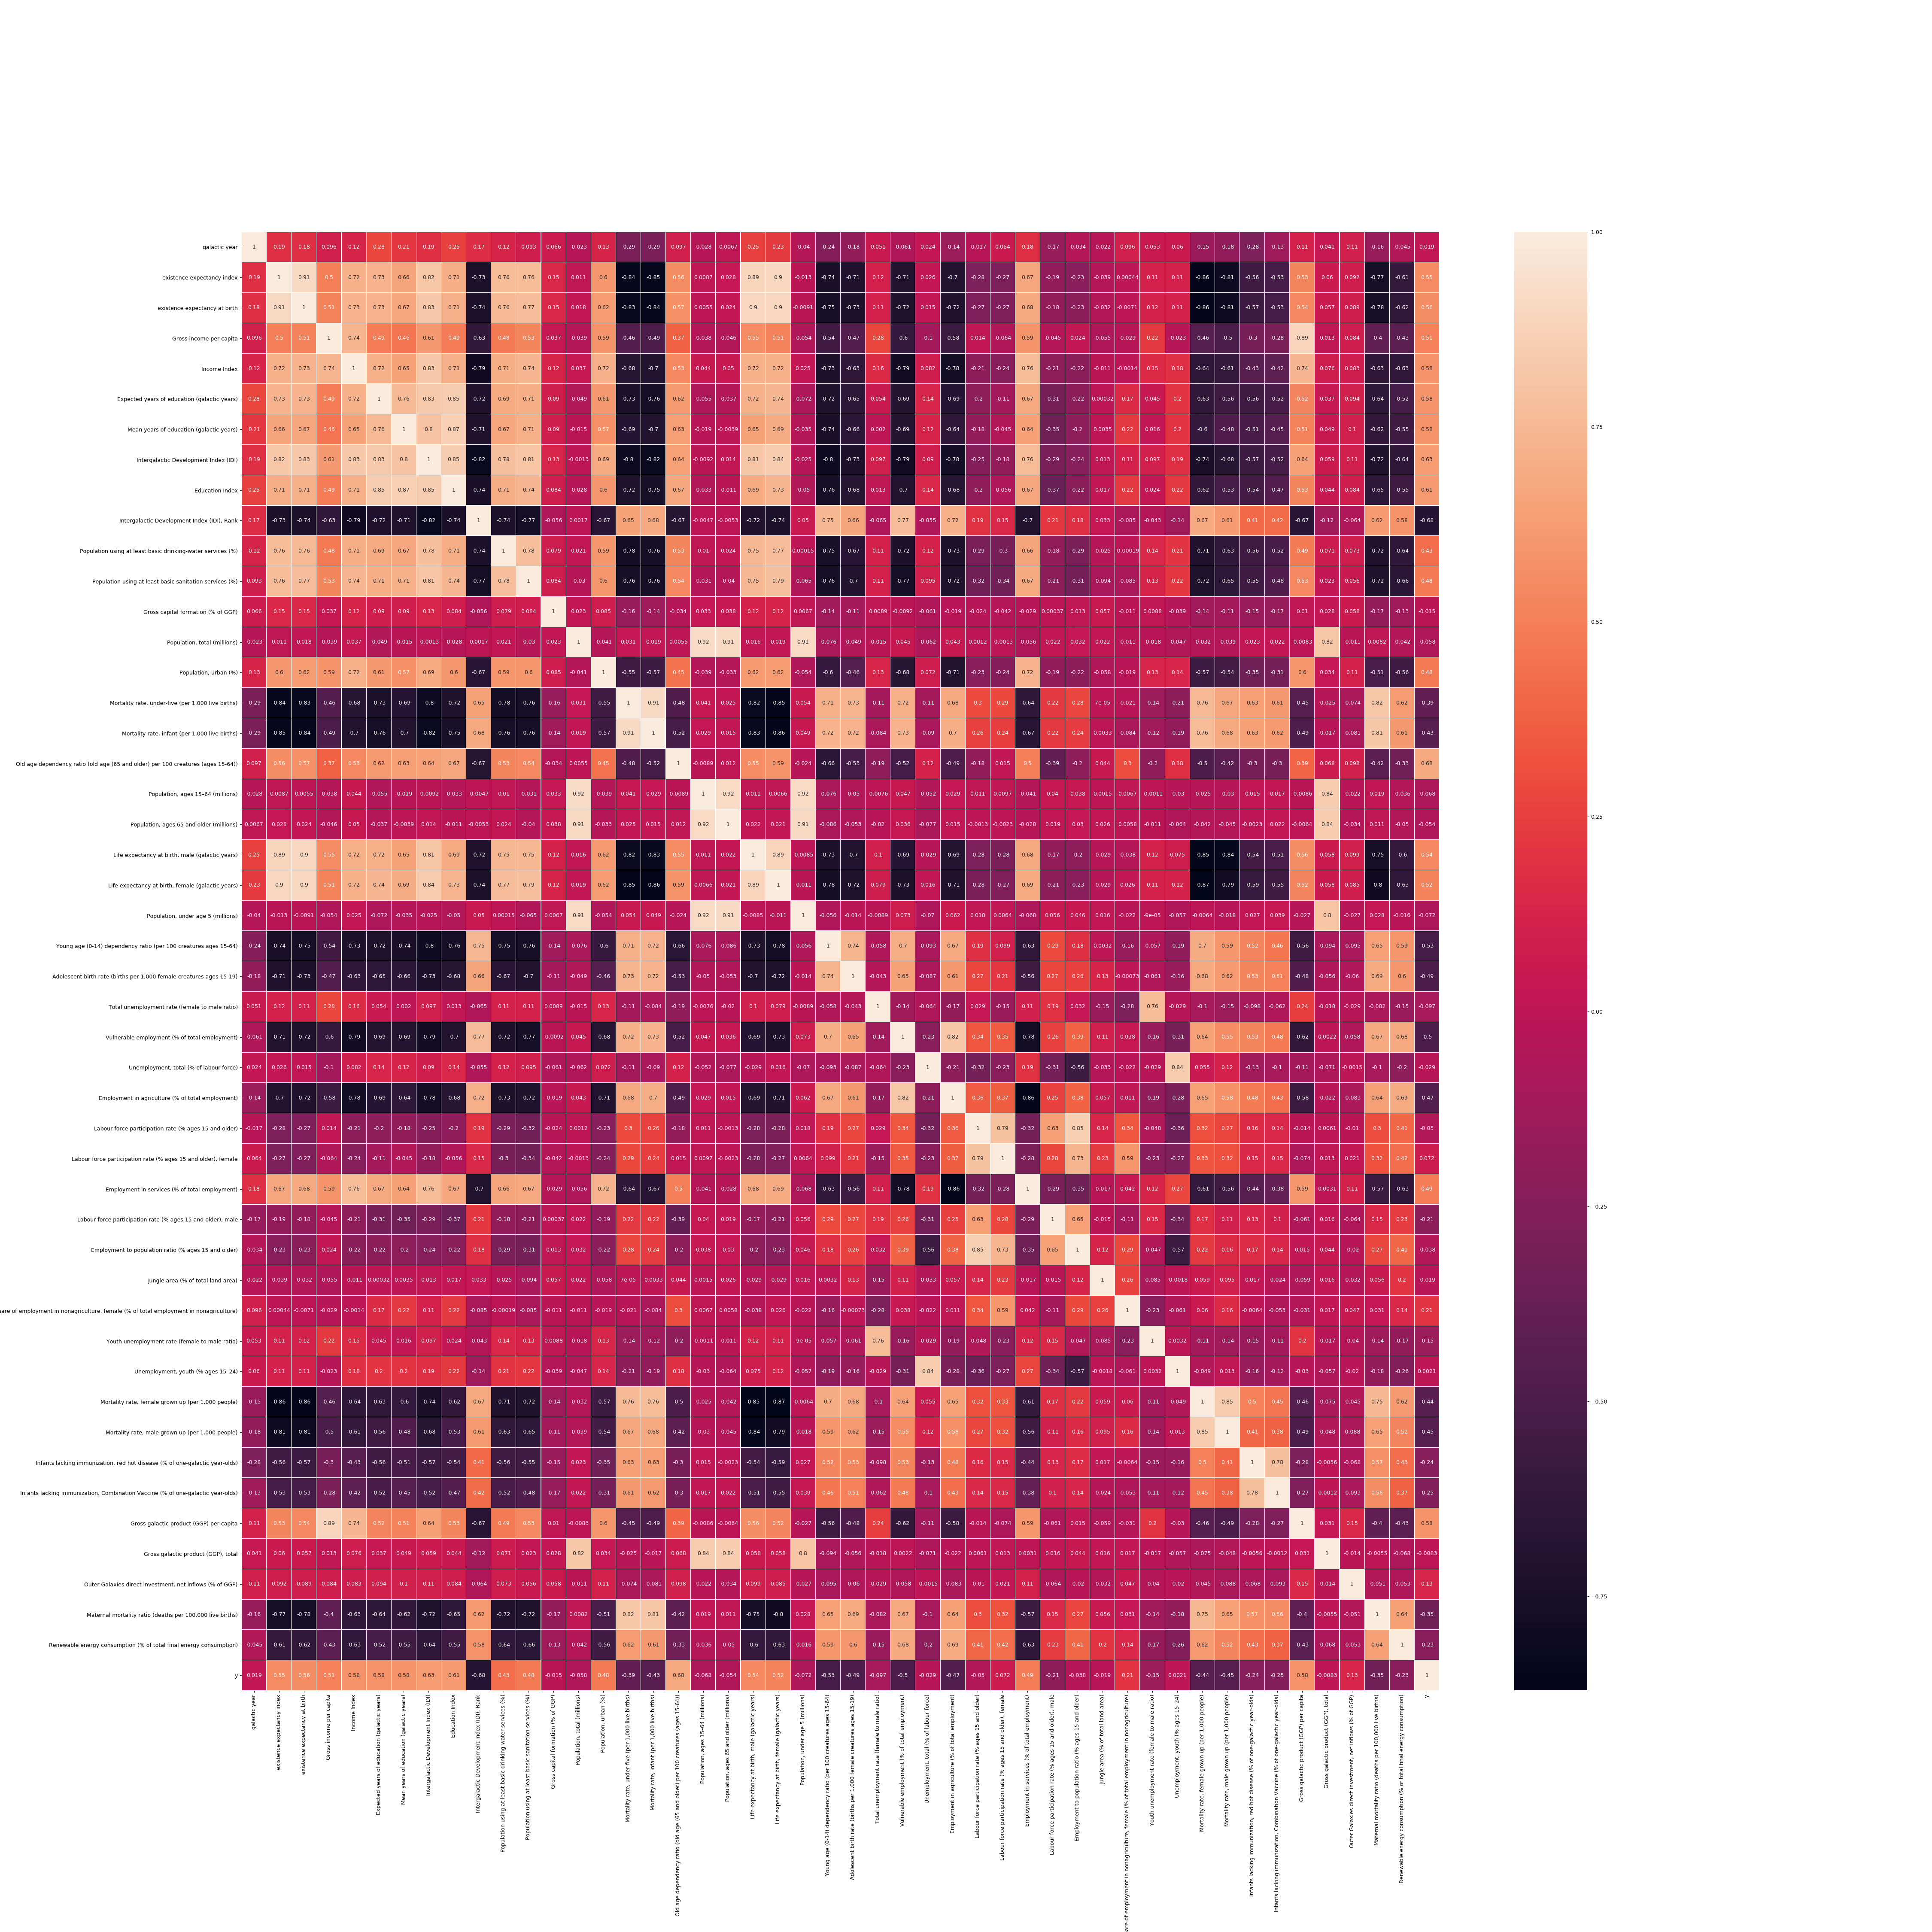

In [10]:
plt.figure(figsize=(50,50))
bx = sns.heatmap(df.corr(), yticklabels=True, xticklabels=True, linewidths=.1, annot=True)
plt.show()

In [11]:
X = df.iloc[:,df.columns != 'y']
quant_X = X.quantile([.25, .75])
copy = quant_X.copy()
for i in range(len(copy.iloc[0])):
    copy.iloc[0,i] -= ((quant_X.iloc[1,i] - quant_X.iloc[0,i]) * 1.5)
    copy.iloc[1,i] += ((quant_X.iloc[1,i] - quant_X.iloc[0,i]) * 1.5)
X = X.apply(lambda x: x[(x>copy.loc[0.25,x.name]) & 
                                    (x < copy.loc[0.75,x.name])], axis=0)
X.fillna(X.median(), inplace=True)

In [12]:
X = df.iloc[:,df.columns != 'y']

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
X = pd.DataFrame(data = imp_mean.fit_transform(X))
X

D:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


0         1          2             3         4          5  \
0      990025.0  0.628657  63.125200  27109.234310  0.646039   8.240543   
1      990025.0  0.818082  81.004994  30166.793958  0.852246  10.671823   
2      990025.0  0.659443  59.570534   8441.707353  0.499762   8.840316   
3      990025.0  0.555862  52.333293  29330.208922  0.548099   6.167752   
4      990025.0  0.991196  81.802464  81033.956906  1.131163  13.800672   
...         ...       ...        ...           ...       ...        ...   
3860  1015056.0  1.029704  82.832063  34310.471408  0.855094  18.578586   
3861  1015056.0  0.937869  75.877098  36899.067719  0.929494  16.153857   
3862  1015056.0  1.036144  93.540275  37002.977875  1.085245  21.066473   
3863  1015056.0  0.939034  78.274427  28180.459770  0.687655   9.388911   
3864  1015056.0  1.032244  91.641356  73109.215949  1.207746  18.910920   

              6         7         8           9          10          11  \
0      5.325684  0.542996  0.395012  181.937361   68.424009   60.456775   
1      4.742470  0.833624  0.467873  152.522198   97.181261  101.880928   
2      5.583973  0.469110  0.363837  209.813266   58.020102   43.780762   
3      4.375931  0.412957  0.298289  174.766289   29.243897   23.056826   
4     13.188907  0.910341  0.918353   71.885345  126.740795  125.361326   
...         ...       ...       ...         ...         ...         ...   
3860  10.557143  0.906573  0.862826  144.896214  116.585709  121.891775   
3861   9.151665  0.865822  0.747577  164.692000  121.672753  115.422812   
3862  16.661344  0.983835  1.100779   63.726437  125.376956  114.907359   
3863   8.908748  0.735694  0.602703  216.805701  105.345928   88.416415   
3864  16.202486  1.171634  1.085080   63.924650  111.904849  139.787997   

             12           13          14          15          16         17  \
0     38.305483   681.841086   22.131436  150.259290  129.841789  12.403812   
1     36.255559   423.973089   89.294181  117.069332   61.822590  13.054898   
2     18.093991   285.572207   57.491083  226.523760  134.558437  15.963001   
3     24.559116   327.202247   47.785456  279.000175  193.228799  12.940991   
4     34.497468   633.799718  103.562629   28.359587   51.098250  25.521926   
...         ...          ...         ...         ...         ...        ...   
3860  33.794198   788.646753   80.995036   82.429338   35.349419  20.499402   
3861  21.910411   748.743339   91.262021   47.757614   51.090321  22.408791   
3862  33.449932   450.570220  104.124986   37.223592   31.273938  40.940587   
3863  21.174887  1210.606101   63.830034  107.424090  103.219817  16.424062   
3864  25.976448  1123.239191  109.735487   10.371582   25.612730  31.652982   

              18         19         20         21          22          23  \
0     490.446400  60.121580  57.028183  69.825369   46.018230   98.216072   
1     560.547706  58.573002  69.873905  76.752305   40.167960   88.322574   
2     555.012461  43.078497  59.462626  59.152506   91.093668  114.163995   
3     766.807703  51.318372  50.535797  54.931369   92.727892   97.645232   
4     585.434804  56.158054  85.020965  84.708158   71.493810   53.835875   
...          ...        ...        ...        ...         ...         ...   
3860  117.287709  77.596516  80.433249  87.734437   66.014946   65.871536   
3861  423.549470  74.323639  74.918634  87.978092   46.194266   59.465322   
3862  524.984001  73.823661  81.199307  89.129118   69.595191   47.791507   
3863  303.800255  56.878177  75.998228  79.144631  135.562633   81.919256   
3864  857.145507  64.175312  81.794740  93.643904  128.592461   46.124073   

              24        25          26         27          28         29  \
0     174.617899  2.973527  106.485011  12.479950   97.185422  79.614066   
1     109.892385  3.352589   64.680407  13.789009   49.024717  63.813720   
2     230.573666  2.475579  110.071886  14.548424   92.442471  80.874149   
3     198.971328  2.644377  128.55

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(principalDf) 
principalDf = pd.DataFrame(data = X_scaled, columns = ['principal component 1', 'principal component 2'])
principalDf.to_csv('PCA.csv', index=False)

In [15]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svdComponents = svd.fit_transform(X)
svdDf = pd.DataFrame(data = svdComponents)
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(svdDf) 
svdDf = pd.DataFrame(data = X_scaled)

In [16]:
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_scaled)

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, df['y'], test_size=0.3)

In [18]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [19]:
svr_poly.fit(X_train, y_train.values.flatten())
svr_prediction = svr_poly.predict(X_test)
mean_squared_error(y_test, svr_prediction, sample_weight=None, multioutput='uniform_average', squared=False)

0.04374431736067675